In [6]:
import json
# import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbrn
# from matplotlib.colors import LogNorm
# import sys
# import os 
sbrn.set_context('paper')
fontsize = 13
custom = {"axes.edgecolor": "black","grid.linestyle": "dashed", "grid.color": "gray"}
sbrn.set_style("whitegrid", rc = custom)

# Open the JSON file for reading
with open('data2.json', 'r') as file:
    data = json.load(file)
    
# Initialize a list to store the extracted data
extracted_data = []

# Loop through the benchmarks in the JSON data
for benchmark in data['benchmarks']:
    # Extract the relevant information
    name = benchmark['name']
    real_time = benchmark['real_time']
    bytes = benchmark['bytes']
    
    # Determine the communication type from the name
    if 'KokkosComm' in name:
        comm_type = 'KokkosComm'
    elif 'MPI' in name:
        comm_type = 'MPI'
    else:
        continue  # Skip if neither
    
    # Determine the function type from the name
    if 'sendrecv' in name:
        func_type = 'send/recv'
    elif 'isendirecv' in name:
        func_type = 'isend/irecv'
    else:
        continue  # Skip if neither
    
    # Append the extracted information to the list
    extracted_data.append({'comm_type': comm_type, 'func_type': func_type, 'real_time': real_time, 'bytes': bytes})

# Convert the list to a pandas DataFrame
df = pd.DataFrame(extracted_data)

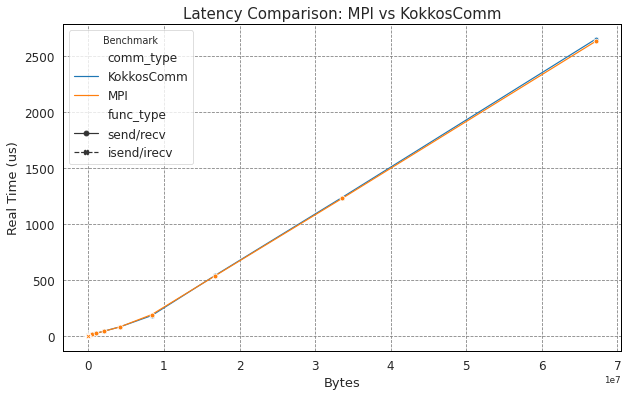

In [7]:
plt.figure(figsize=(10, 6))
sbrn.lineplot(data=df, x='bytes', y='real_time', hue='comm_type', style='func_type', markers=True, ci=None)

plt.title('Latency Comparison: MPI vs KokkosComm', fontsize=fontsize+2)
plt.xlabel('Bytes', fontsize=fontsize)
plt.ylabel('Real Time (us)', fontsize=fontsize)
plt.xticks(fontsize=fontsize-1)
plt.yticks(fontsize=fontsize-1)
plt.legend(title='Benchmark', fontsize=fontsize-1)
plt.grid(True)

plt.savefig("./PNG/test.png", dpi=300)
plt.show()